In [368]:
# Python
import pandas as pd

#
from pathlib import Path
from datetime import datetime
#

from sklearn.metrics import make_scorer, mean_absolute_error
#
import importlib
import utilities.train_test.train_test as train_test
import utilities.mpt_utils as mpt_utils
import utilities.plots as plots
import utilities.xgboost_utils as xgboost_utils
import utilities.variables as variables

In [369]:
df = pd.read_csv('../../../data/df_monthly_prices_complete_euro.csv', index_col='Date')
df_pct = pd.read_csv('../../../data/df_monthly_returns_complete.csv', index_col='Date')
df_prices = pd.read_csv('../../../data/df_monthly_prices_complete.csv', index_col='Date')
df_overview = pd.read_csv('../../../data/df_overview.csv', index_col=0)

## Create Tabular Time-Series DataFrame

In [370]:
importlib.reload(train_test)
 
file=Path("../../../data/df_tabular_multi.csv")

if file.exists():
    df_tabular_multi=pd.read_csv(file, index_col=0)
else:
    importlib.reload(train_test)
    df_tabular_multi = train_test.get_dataframe_tabular_multi(df_pct)
    df_tabular_multi.to_csv(file)

In [371]:
df_tabular_multi.columns

Index(['month', 'year', 'date', 'm_return(t-11)', 'm_return(t-10)',
       'm_return(t-9)', 'm_return(t-8)', 'm_return(t-7)', 'm_return(t-6)',
       'm_return(t-5)', 'm_return(t-4)', 'm_return(t-3)', 'm_return(t-2)',
       'm_return(t-1)', 'm_return(t)', 'm_return_target(t+1)',
       'm_return_target(t+2)', 'm_return_target(t+3)', 'm_return_target(t+4)',
       'm_return_target(t+5)', 'm_return_target(t+6)', 'm_return_target(t+7)',
       'm_return_target(t+8)', 'm_return_target(t+9)', 'm_return_target(t+10)',
       'm_return_target(t+11)', 'm_return_target(t+12)', 'stock_ticker_label',
       'company_esg_score', 'trailing_pe', 'beta', 'return_on_equity',
       'earnings_growth', 'company_esg_score_scale', 'market_capital_scale',
       'industry_Auto Components', 'industry_Automobiles', 'industry_Banks',
       'industry_Building Products', 'industry_Chemicals',
       'industry_Commercial Services', 'industry_Construction Materials',
       'industry_Consumer Durables', 'indust

## XGBoost Multivariate - 1 Month

In [372]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)
importlib.reload(variables)
#
X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=variables.TEST_MONTHS_NR)
#
model_1m, score_1m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:0.11709	validation_1-rmse:0.10010
[1]	validation_0-rmse:0.11700	validation_1-rmse:0.10002
[2]	validation_0-rmse:0.11689	validation_1-rmse:0.09999
[3]	validation_0-rmse:0.11666	validation_1-rmse:0.10000
[4]	validation_0-rmse:0.11658	validation_1-rmse:0.09999
[5]	validation_0-rmse:0.11650	validation_1-rmse:0.09997
[6]	validation_0-rmse:0.11642	validation_1-rmse:0.09993
[7]	validation_0-rmse:0.11634	validation_1-rmse:0.09992
[8]	validation_0-rmse:0.11612	validation_1-rmse:0.09995
[9]	validation_0-rmse:0.11606	validation_1-rmse:0.09994
[10]	validation_0-rmse:0.11596	validation_1-rmse:0.09993
[11]	validation_0-rmse:0.11582	validation_1-rmse:0.09993
[12]	validation_0-rmse:0.11576	validation_1-rmse:0.09992
[13]	validation_0-rmse:0.11564	validation_1-rmse:0.09993
[14]	validation_0-rmse:0.11558	validation_1-rmse:0.09994
[15]	validation_0-rmse:0.11547	validation_1-rmse:0.09998
[16]	validation_0-rmse:0.11539	validation_1-rmse:0.09996
[17]	validation_0-rmse:0.11534	validation

In [373]:
df_tabular_multi

,month,year,date,m_return(t-11),m_return(t-10),m_return(t-9),m_return(t-8),m_return(t-7),m_return(t-6),m_return(t-5),...,industry_Traders & Distributors,industry_Transportation,industry_Transportation Infrastructure,industry_Utilities,stock_exchange_ETR,stock_exchange_LON,stock_exchange_NAS,stock_exchange_NYS,stock_exchange_TKS,trailing_pe_scaled
0,11,2000,2000-11-01,1.05,0.91,1.30,1.00,0.97,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0085
1,12,2000,2000-12-01,0.91,1.30,1.00,0.97,1.00,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0085
2,1,2001,2001-01-01,1.30,1.00,0.97,1.00,1.00,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0085
3,2,2001,2001-02-01,1.00,0.97,1.00,1.00,1.00,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0085
4,3,2001,2001-03-01,0.97,1.00,1.00,1.00,1.00,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380947,4,2024,2024-04-01,0.97,0.98,1.04,0.98,0.98,0.99,1.03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0032
380948,5,2024,2024-05-01,0.98,1.04,0.98,0.98,0.99,1.03,1.11,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0032
380949,6,2024,2024-06-01,1.04,0.98,0.98,0.99,1.03,1.11,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0032
380950,7,2024,2024-07-01,0.98,0.98,0.99,1.03,1.11,1.00,1.04,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0032


In [374]:
months_1m = 1
X_train_1m, y_train_1m, X_test_1m, y_test_1m, min_datestr_1m = train_test.split_train_test_tabular(df_tabular_multi, months=1)
# reset index
X_train_1m.reset_index(drop=True, inplace=True)
y_train_1m.reset_index(drop=True, inplace=True)
X_test_1m.reset_index(drop=True, inplace=True)
y_test_1m.reset_index(drop=True, inplace=True)

In [375]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 6 months
X_train_input_1m = X_train_1m.head(len(X_train_1m) - len(df_pct.columns) * months_1m)
# Get last 6 months of the training dataset and use as input to predict the next 6 months
X_test_input_1m = X_train_1m.tail(len(df_pct.columns) * months_1m)

# Trained 
y_train_pred_1m = model_1m.predict(X_train_input_1m)
# Predictions
y_test_pred_1m = model_1m.predict(X_test_input_1m)

### 1 month Actual vs Prediction

In [376]:
importlib.reload(mpt_utils)
importlib.reload(plots)

y_train_mean_pred_1m, y_test_mean_pred_1m = mpt_utils.get_train_test_mean_pred(y_train_pred_1m, y_test_pred_1m, len(df_pct.columns))
plots.generate_timeseries_plot(df_pct, df_tabular_multi, y_train_mean_pred_1m, y_test_mean_pred_1m)

284.0


#### Allocation - 1 Month

In order for Mean-Variance Optimisation to create an optimal portfolio, by allocation to the best performing tickers, 
based on their weight and price. Predicted return and those being evaluated have to be adopted to the actual prices.


In [377]:
importlib.reload(mpt_utils)

# Get train true values followed with predicted month/s
y_train_1m_list = y_train_1m['m_return_target(t+1)'].tolist()
y_test_1m_list = y_test_pred_1m.tolist()
#
df_to_evaluate_1m = mpt_utils.get_df_from_pred_list(df_pct, y_train_1m_list, y_test_1m_list)
df_to_evaluate_1m = df_to_evaluate_1m - 1
#
df_to_evaluate_1m.tail(3)

,GME,2124.T,2491.T,2471.T,3046.T,PAT.DE,CROX,AOF.DE,SFQ.DE,DAN,...,KREF,HLN.L,DBX,BNL,CBL,KVUE,PSTL,NTST,BLCO,NBS.L
283,-0.080000,0.100000,0.020000,-0.020000,0.17000,0.070000,-0.080000,0.220000,0.080000,0.05000,...,0.300000,0.080000,0.060000,0.120000,0.120000,0.020000,0.120000,0.040000,0.190000,0.000000
284,0.030000,0.040000,-0.030000,0.120000,0.14000,0.120000,0.090000,0.020000,-0.080000,-0.11000,...,0.040000,0.090000,0.050000,0.050000,0.020000,0.190000,-0.030000,0.010000,-0.050000,0.000000
285,-0.051674,-0.047119,-0.031614,-0.018961,-0.02534,0.003193,0.010767,0.011744,0.003194,0.00304,...,0.022931,0.004688,0.015694,-0.015178,-0.012599,-0.007574,-0.003856,0.001067,-0.000865,-0.013818


In [378]:
importlib.reload(mpt_utils)

weights_1m, mu_1m, S_1m, weights_all_1m = mpt_utils.portfolio_and_plot(df_to_evaluate_1m, df, plot_threshold=0.015)

Expected annual return: 52.1%
Annual volatility: 11.4%
Sharpe Ratio: 4.38
-- Allocation --
{'6736.T': 6, '8022.T': 2, 'LRN': 1, '7599.T': 13, 'AVGO': 1, '8129.T': 3, 'NVDA': 1, 'ASCL.L': 1, 'ANF': 1, 'AGYS': 1, 'SFM': 1, 'APP': 1, 'CVLT': 1, 'BRBY.L': 1, '9024.T': 3, '9869.T': 2, '8282.T': 7, 'NL': 12, '2327.T': 2, 'MSI': 1, '6941.T': 3, 'PNN.L': 1, 'IDS.L': 1, '9766.T': 1, '9468.T': 3, '9101.T': 2, '7309.T': 1, 'HL.L': 1, '8977.T': 1, 'FTK.DE': 4, '2433.T': 8, '9934.T': 2, 'NEM.DE': 1, '7832.T': 3, '8283.T': 2, '4732.T': 6, '7419.T': 5, 'BGC': 6, 'STAA': 1, '4568.T': 1, 'GBF.DE': 1, '4324.T': 1, '3626.T': 2, '8012.T': 2, 'AMAL': 1, '7552.T': 2, '9831.T': 16, '9072.T': 2, '7483.T': 3, '2790.T': 2, '7947.T': 2, '7936.T': 2, '7906.T': 3, 'COP.DE': 2, '9842.T': 3, '7846.T': 1, '2331.T': 6, '9104.T': 1, '4549.T': 2, '2733.T': 1, '8818.T': 3, '7915.T': 3, '8309.T': 1, '7951.T': 1, '9260.T': 3, '7762.T': 6, '3148.T': 1, 'RELL': 2, '9107.T': 2, '9076.T': 1, '9434.T': 2, 'DOLE': 2, '5334.T': 1

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview

#### Overview - 1 Month

In [379]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_1m, mu_1m, S_1m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
6736.T,6,-0.050965,178.69%,31.39%,296.94%
8022.T,2,-0.011316,18.51%,75.44%,93.58%
LRN,1,-0.012105,-56.30%,62.22%,75.45%
7599.T,13,0.009298,68.23%,26.14%,50.01%
AVGO,1,0.001667,260.69%,83.55%,81.33%
...,...,...,...,...,...
FNKO,1,-0.039211,30.98%,-62.69%,34.43%
8897.T,3,0.023860,-5.39%,12.26%,12.31%
2874.T,1,0.043070,26.87%,30.54%,-14.93%
9470.T,1,0.002982,-14.91%,-10.92%,17.16%


## 6 Months


In [380]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)

X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=variables.TEST_MONTHS_NR, target_key='m_return_target(t+6)')
#
model_6m, score_6m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:0.11617	validation_1-rmse:0.09337
[1]	validation_0-rmse:0.11606	validation_1-rmse:0.09332
[2]	validation_0-rmse:0.11590	validation_1-rmse:0.09335
[3]	validation_0-rmse:0.11582	validation_1-rmse:0.09333
[4]	validation_0-rmse:0.11574	validation_1-rmse:0.09330
[5]	validation_0-rmse:0.11558	validation_1-rmse:0.09334
[6]	validation_0-rmse:0.11549	validation_1-rmse:0.09330
[7]	validation_0-rmse:0.11541	validation_1-rmse:0.09330
[8]	validation_0-rmse:0.11534	validation_1-rmse:0.09332
[9]	validation_0-rmse:0.11526	validation_1-rmse:0.09333
[10]	validation_0-rmse:0.11517	validation_1-rmse:0.09333
[11]	validation_0-rmse:0.11509	validation_1-rmse:0.09339
[12]	validation_0-rmse:0.11502	validation_1-rmse:0.09339
[13]	validation_0-rmse:0.11495	validation_1-rmse:0.09338
[14]	validation_0-rmse:0.11488	validation_1-rmse:0.09337
[15]	validation_0-rmse:0.11482	validation_1-rmse:0.09338
[16]	validation_0-rmse:0.11477	validation_1-rmse:0.09341
[17]	validation_0-rmse:0.11468	validation

In [381]:
months_6m = 6
X_train_6m, y_train_6m, X_test_6m, y_test_6m, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=6,
                                                                                      target_key='m_return_target(t+6)')

In [382]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 6 months
X_train_input_6m = X_train_6m.head(len(X_train_6m) - len(df_pct.columns)*months_6m)
# Get last 6 months of the training dataset and use as input to predict the next 6 months
X_test_input_6m = X_train_6m.tail(len(df_pct.columns)*months_6m)

# Trained 
y_train_pred_6m = model_6m.predict(X_train_input_6m)
# Predictions
y_test_pred_6m = model_6m.predict(X_test_input_6m)

### 6 Months Actual vs Prediction

In [383]:
importlib.reload(mpt_utils)
y_train_mean_pred_6m, y_test_mean_pred_6m = mpt_utils.get_train_test_mean_pred(y_train_pred_6m, y_test_pred_6m, len(df_pct.columns))
#
plots.generate_timeseries_plot(df_pct, df_tabular_multi, y_train_mean_pred_6m, y_test_mean_pred_6m)

274.0


#### Allocation

In [384]:
# Get train true values followed with predicted month/s
y_train_6m_list = y_train_6m['m_return_target(t+6)'].tolist()
y_pred_6m_list = y_test_pred_6m.tolist()
#
df_to_evaluate_6m = mpt_utils.get_df_from_pred_list(df_pct, y_train_1m_list, y_pred_6m_list)
df_to_evaluate_6m = df_to_evaluate_6m - 1
df_to_evaluate_6m.head(3)

,GME,2124.T,2491.T,2471.T,3046.T,PAT.DE,CROX,AOF.DE,SFQ.DE,DAN,...,KREF,HLN.L,DBX,BNL,CBL,KVUE,PSTL,NTST,BLCO,NBS.L
0,0.00,-0.16,-0.11,0.00,0.00,0.00,0.00,-0.27,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
1,0.00,-0.50,-0.20,-0.47,-0.06,-0.36,-0.14,0.28,-0.10,0.00,...,0.03,0.0,0.01,0.00,-0.04,0.0,0.0,0.00,0.0,-0.01
2,0.03,0.01,-0.27,-0.25,0.00,-0.29,-0.30,-0.16,-0.11,-0.14,...,0.00,0.0,0.00,-0.05,0.00,0.0,0.0,-0.03,0.0,-0.03


In order for Mean-Variance Optimisation to create an optimal portfolio, by allocation to the best performing tickers, 
based on their weight and price. Predicted return and those being evaluated have to be adopted to the actual prices.

In [385]:
importlib.reload(mpt_utils)

weights_6m, mu_6m, S_6m, weights_all_6m = mpt_utils.portfolio_and_plot(df_to_evaluate_6m, df, plot_threshold=0.015)

Expected annual return: 21.2%
Annual volatility: 5.1%
Sharpe Ratio: 3.75
-- Allocation --
{'HAE': 1, 'KBR': 1, 'NL': 11, '6736.T': 2, '8972.T': 1, 'BYG.L': 1, 'DORM': 1, '8022.T': 1, '8012.T': 2, 'CSR': 1, 'TAL': 12, '3659.T': 2, '2692.T': 1, 'BOOT': 1, 'MDB': 1, 'DAR': 1, 'SMTC': 1, '9107.T': 4, '7483.T': 2, '6055.T': 4, 'TRU': 1, 'OMCL': 1, 'MMSI': 1, 'LULU': 1, '6758.T': 1, 'CVNA': 1, 'GROW.L': 1, 'BYW6.DE': 3, '6417.T': 4, '7419.T': 4, 'GLW': 1, '7476.T': 2, 'PLUS.L': 1, '4568.T': 1, '7911.T': 1, '5991.T': 4, 'TTC': 1, '7988.T': 1, 'GFT.DE': 1, '8282.T': 3, '6845.T': 1, 'TPE.DE': 3, '3132.T': 1, '3608.T': 4, 'ICHR': 2, '2760.T': 2, '8129.T': 1, '7718.T': 2, '9104.T': 1, '7613.T': 5, 'ENR.DE': 2, '8173.T': 1, '7868.T': 13, '9470.T': 5, 'AY': 1, '9790.T': 1, '2733.T': 1, 'VNA.DE': 1, '5332.T': 1, '8876.T': 2, '9729.T': 2, '3738.T': 1, '4301.T': 3, '6951.T': 1, '8150.T': 2, '6651.T': 1, 'SLP': 1, '6460.T': 1, '9869.T': 1, '8151.T': 3, '6744.T': 2, '9882.T': 1, '2784.T': 1, '9364.T': 1

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview - 6 Months

In [386]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_6m, mu_6m, S_6m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
HAE,1,0.004000,7.51%,-0.65%,-18.21%
KBR,1,-0.006345,14.75%,18.23%,3.81%
NL,11,-0.031034,-13.20%,-40.53%,53.47%
6736.T,2,0.013034,-39.64%,31.39%,296.94%
8972.T,1,-0.003034,-16.54%,-0.66%,-4.56%
...,...,...,...,...,...
3050.T,1,-0.010276,-23.03%,3.66%,25.78%
9474.T,1,0.018828,36.76%,2.30%,-3.39%
4745.T,2,0.000483,-9.17%,1.24%,-14.36%
6644.T,1,0.003241,-14.03%,25.05%,8.48%


## 12 Months

In [387]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)

X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=variables.TEST_MONTHS_NR,
                                                                                    target_key='m_return_target(t+12)')
#
model_12m, score_12m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:0.11545	validation_1-rmse:0.08109
[1]	validation_0-rmse:0.11538	validation_1-rmse:0.08045
[2]	validation_0-rmse:0.11530	validation_1-rmse:0.08043
[3]	validation_0-rmse:0.11523	validation_1-rmse:0.08026
[4]	validation_0-rmse:0.11516	validation_1-rmse:0.08014
[5]	validation_0-rmse:0.11507	validation_1-rmse:0.08015
[6]	validation_0-rmse:0.11501	validation_1-rmse:0.08009
[7]	validation_0-rmse:0.11495	validation_1-rmse:0.08006
[8]	validation_0-rmse:0.11487	validation_1-rmse:0.07971
[9]	validation_0-rmse:0.11480	validation_1-rmse:0.07954
[10]	validation_0-rmse:0.11475	validation_1-rmse:0.07950
[11]	validation_0-rmse:0.11469	validation_1-rmse:0.07934
[12]	validation_0-rmse:0.11464	validation_1-rmse:0.07909
[13]	validation_0-rmse:0.11455	validation_1-rmse:0.07902
[14]	validation_0-rmse:0.11451	validation_1-rmse:0.07905
[15]	validation_0-rmse:0.11440	validation_1-rmse:0.07902
[16]	validation_0-rmse:0.11435	validation_1-rmse:0.07894
[17]	validation_0-rmse:0.11430	validation

In [388]:
months_12m = 12
X_train_12m, y_train_12m, X_test_12m, y_test_12m, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=months_12m,
                                                                                          target_key='m_return_target(t+12)')

In [389]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 12 months
X_train_input_12m = X_train_12m.head(len(X_train_12m) - len(df_pct.columns)*months_12m)
# Get last 6 months of the training dataset and use as input to predict the next 12 months
X_test_input_12m = X_train_12m.tail(len(df_pct.columns)*months_12m)

# Trained 
y_train_pred_12m = model_12m.predict(X_train_input_12m)
# Predictions
y_test_pred_12m = model_12m.predict(X_test_input_12m)

### 12 Months Actual vs Prediction

In [390]:
importlib.reload(mpt_utils)
#
y_train_mean_pred_12m, y_test_mean_pred_12m = mpt_utils.get_train_test_mean_pred(y_train_pred_12m, y_test_pred_12m, len(df_pct.columns))
#
plots.generate_timeseries_plot(df_pct, df_tabular_multi, y_train_mean_pred_12m, y_test_mean_pred_12m)

262.0


#### Allocation

In [391]:
importlib.reload(mpt_utils)

# Get train true values followed with predicted month/s
y_train_12m_list = y_train_12m['m_return_target(t+12)'].tolist()
y_test_12m_list = y_test_pred_12m.tolist()
#
df_to_evaluate_12m = mpt_utils.get_df_from_pred_list(df_pct, y_train_12m_list, y_test_12m_list)
df_to_evaluate_12m = df_to_evaluate_12m - 1
df_to_evaluate_12m

,GME,2124.T,2491.T,2471.T,3046.T,PAT.DE,CROX,AOF.DE,SFQ.DE,DAN,...,KREF,HLN.L,DBX,BNL,CBL,KVUE,PSTL,NTST,BLCO,NBS.L
0,0.000000,-0.030000,0.090000,0.060000,0.260000,0.120000,0.200000,0.370000,0.110000,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,-0.040000,-0.050000,-0.070000,-0.220000,-0.130000,-0.170000,0.260000,-0.090000,-0.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,-0.030000,0.080000,0.060000,0.310000,0.120000,0.200000,-0.140000,0.110000,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.010000,0.010000,0.050000,0.030000,0.940000,0.150000,0.390000,0.200000,0.000000,0.550000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.001861,-0.004618,0.007040,0.021484,0.027083,-0.011992,0.004698,-0.003909,-0.001842,0.018930,...,0.007671,0.009142,0.010564,0.004486,0.025480,0.013043,0.015253,-0.016993,0.003992,0.009293
282,0.002837,-0.006437,0.005220,0.019598,0.016799,-0.025274,-0.004154,0.004878,0.010324,0.015049,...,0.006934,0.010685,0.005005,0.002164,0.011171,0.012119,0.010814,-0.018313,0.003103,0.014944
283,0.006398,-0.008146,0.016693,0.033106,0.021435,0.009683,0.005314,-0.004534,-0.003401,0.016040,...,0.004244,0.004515,0.004547,-0.000674,0.010438,0.010090,0.008785,-0.022944,0.003340,0.002395
284,0.015416,0.000872,0.033767,0.060698,0.020390,0.024066,0.036396,-0.007209,0.005033,0.008299,...,0.007146,0.009705,0.008398,0.005777,0.019606,0.012694,0.011389,0.005588,0.020836,0.034491


In [392]:
importlib.reload(mpt_utils)

weights_12m, mu_12m, S_12m, weights_all_12m = mpt_utils.portfolio_and_plot(df_to_evaluate_12m, df, plot_threshold=0.015)

Expected annual return: 15.3%
Annual volatility: 0.5%
Sharpe Ratio: 28.66
-- Allocation --
{'WINA': 1, 'ANSS': 1, '3046.T': 1, 'HAS': 1, 'DAY': 1, 'AMT': 1, 'MRTN': 1, 'NL': 6, 'NOVT': 1, 'PRGS': 1, '4745.T': 7, 'NHI': 1, 'WSM': 1, 'AAPL': 1, 'RBLX': 1, 'A': 1, '8955.T': 1, 'HZO': 1, 'ES': 1, 'MONY.L': 1, 'ILMN': 1, '8060.T': 1, 'BLD': 1, '7915.T': 2, 'HST': 1, 'RS': 1, 'TTG.L': 1, 'OC': 1, 'HRI': 1, 'RSG': 1, 'ZUMZ': 1, 'BMY.L': 1, 'AGNC': 3, '7832.T': 1, '2120.T': 14, '8876.T': 2, 'PANW': 1, '9790.T': 1, 'UPBD': 1, '3738.T': 1, '6471.T': 3, '3107.T': 1, '8219.T': 2, 'YUMC': 1, 'TDC': 1, 'CENT': 1, 'STX': 1, '2471.T': 8, 'RWA.L': 1, 'DLAR.L': 1, 'RGA': 1, '7893.T': 2, 'ROKU': 1, 'HSIC': 1, 'BCYC': 1, 'WSC': 1, 'DKS': 1, 'LSCC': 1, '8802.T': 1, 'LYB': 1, 'DOCU': 1, 'RUN': 1, 'DAN': 1, '8150.T': 1, '9434.T': 1, '5938.T': 1, 'PMT': 1, '4549.T': 1, '6724.T': 1, '2429.T': 1, '3151.T': 2, '9613.T': 1, '7613.T': 1, '8050.T': 1, 'NVRI': 2, 'ARI': 1, '9729.T': 1, '2491.T': 1, 'FARO': 1, 'KMI':

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview table

In [393]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_12m, mu_12m, S_12m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
WINA,1,-0.000929,16.68%,62.86%,-6.83%
ANSS,1,0.000714,25.16%,25.84%,4.32%
3046.T,1,-0.000786,33.48%,-4.69%,66.83%
HAS,1,0.000500,20.05%,-28.02%,6.28%
DAY,1,-0.000714,12.90%,-3.79%,-14.72%
...,...,...,...,...,...
LSEA,1,0.000143,20.77%,55.46%,31.19%
INN,1,0.001000,12.73%,-32.77%,10.46%
9474.T,1,0.000000,9.76%,2.30%,-3.39%
3608.T,1,-0.000143,11.19%,81.27%,12.53%


## Feature importance

In [394]:
### Feature importance
importlib.reload(plots)
#
plots.plot_feature_importance(model_12m)

### Errors

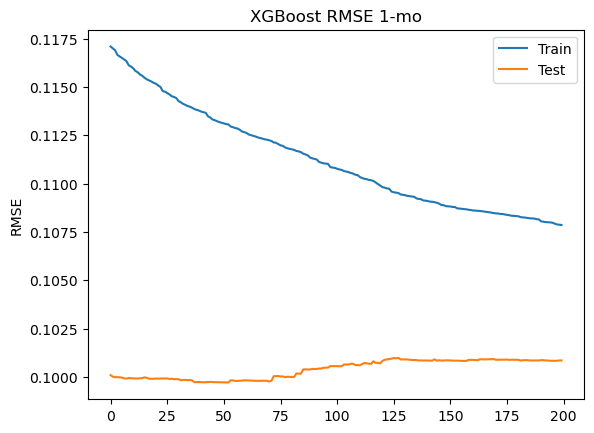

In [395]:
importlib.reload(plots)

plots.plot_xgboost_error(model_1m, 1)

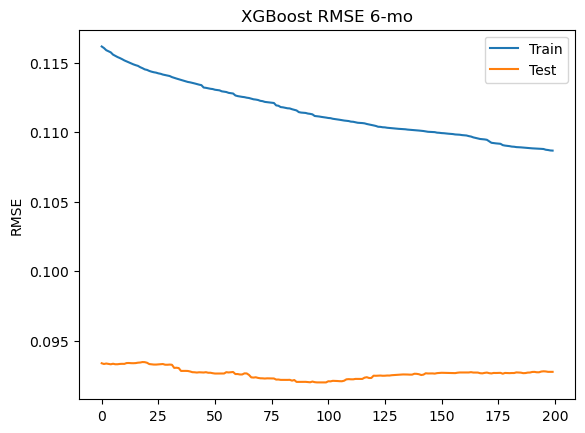

In [396]:
importlib.reload(plots)

plots.plot_xgboost_error(model_6m, 6)

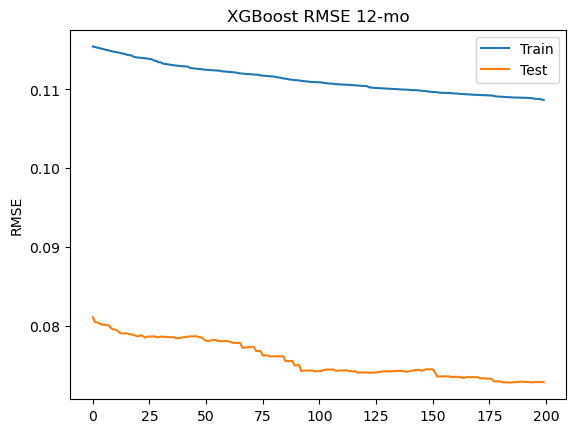

In [397]:
plots.plot_xgboost_error(model_12m, 12)